In [2]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from api_keys import weather_api_key
from citipy import citipy

# Output File (CSV)
csv_file = "resources/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval")


# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" %
          (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("city not found. Skipping...")
        pass

# Indicate that Data Loading is complete

print("Finished processing")


Beginning Data Retrieval
Processing Record 1 of Set 1 | bereda
city not found. Skipping...
Processing Record 2 of Set 1 | qaanaaq
city not found. Skipping...
Processing Record 3 of Set 1 | kutum
city not found. Skipping...
Processing Record 4 of Set 1 | jishou
city not found. Skipping...
Processing Record 5 of Set 1 | faridkot
city not found. Skipping...
Processing Record 6 of Set 1 | cabo san lucas
city not found. Skipping...
Processing Record 7 of Set 1 | bambous virieux
city not found. Skipping...
Processing Record 8 of Set 1 | loandjili
city not found. Skipping...
Processing Record 9 of Set 1 | fortuna
city not found. Skipping...
Processing Record 10 of Set 1 | severomuysk
city not found. Skipping...
Processing Record 11 of Set 1 | mataura
city not found. Skipping...
Processing Record 12 of Set 1 | hithadhoo
city not found. Skipping...
Processing Record 13 of Set 1 | glens falls
city not found. Skipping...
Processing Record 14 of Set 1 | vardo
city not found. Skipping...
Processing

In [10]:
# Convert array of JSONs into Pandas DataFrame
df = pd.DataFrame(city_data)

# Show Record Count
df.count()

City          215
Lat           215
Lng           215
Max Temp      215
Humidity      215
Cloudiness    215
Wind Speed    215
Country       215
Date          215
dtype: int64

In [11]:
df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mahenge,-8.6833,36.7167,62.85,97,44,1.54,TZ,1669854193
1,shaunavon,49.6501,-108.4181,6.58,85,100,19.39,CA,1669854193
2,saint-gaudens,43.0833,0.6667,35.02,75,20,3.74,FR,1669854194
3,osmena,10.5208,119.9258,82.38,79,88,20.38,PH,1669854194
4,ordzhonikidze,52.4411,61.7408,-0.87,84,15,10.71,KZ,1669854195
5,sept-iles,50.2001,-66.3821,31.05,88,100,28.77,CA,1669854195
6,baisha,26.5222,110.9311,29.95,89,100,3.36,CN,1669854195
7,novopokrovka,49.8425,36.5477,29.05,42,100,14.29,UA,1669854195
8,dicabisagan,17.0818,122.4157,79.56,84,98,8.39,PH,1669854196
9,opuwo,-18.0607,13.8400,70.77,48,39,5.30,NA,1669854196


In [12]:
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,2.150000e+02
mean,23.418482,20.258644,47.334651,74.660465,61.018605,8.317953,1.669854e+09
std,31.194895,82.818147,29.894047,20.295505,39.750267,6.637122,4.275098e+01
min,-46.133300,-173.983300,-41.980000,16.000000,0.000000,0.000000,1.669854e+09
25%,-2.287800,-48.511950,29.335000,66.000000,20.000000,3.835000,1.669854e+09
50%,30.294700,27.061900,55.170000,80.000000,76.000000,6.490000,1.669854e+09
75%,49.332200,81.716700,73.365000,89.000000,100.000000,10.180000,1.669854e+09
max,70.996300,175.515300,84.880000,100.000000,100.000000,44.630000,1.669854e+09


In [14]:
city_data = df[(df["Humidity"] > 100)].index                                
city_data

Int64Index([], dtype='int64')

In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_df = df.drop(city_data, inplace=False)
clean_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mahenge,-8.6833,36.7167,62.85,97,44,1.54,TZ,1669854193
1,shaunavon,49.6501,-108.4181,6.58,85,100,19.39,CA,1669854193
2,saint-gaudens,43.0833,0.6667,35.02,75,20,3.74,FR,1669854194
3,osmena,10.5208,119.9258,82.38,79,88,20.38,PH,1669854194
4,ordzhonikidze,52.4411,61.7408,-0.87,84,15,10.71,KZ,1669854195


In [16]:
 # Extract relevant fields from the data frame
lats = clean_df["Lat"]
max_temps = clean_df["Max Temp"]
humidity = clean_df["Humidity"]
cloudiness = clean_df["Cloudiness"]
wind_speed = clean_df["Wind Speed"]

# Export the City_Data into a csv
clean_df.to_csv("resources/city_weather.csv", index_label="City_ID")

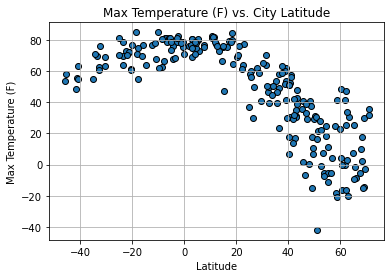

<Figure size 432x288 with 0 Axes>

In [25]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=1, label="Cities")

# Incorporate the other graph properties
plt.title("Max Temperature (F) vs. City Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()
plt.savefig("resources/Fig1.png")


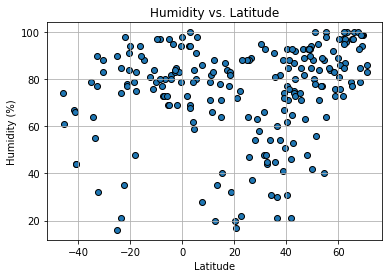

<Figure size 432x288 with 0 Axes>

In [34]:
 # Build the scatter plots for latitude vs. humidity
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", label="Cities")

# Incorporate the other graph properties
plt.title("Humidity vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

plt.savefig("resources/Fig2.png")

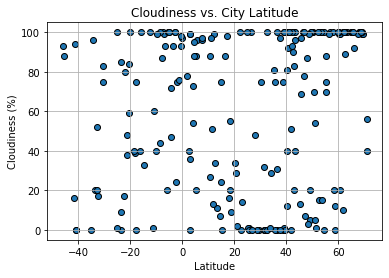

<Figure size 432x288 with 0 Axes>

In [28]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", label="Cities")

# Incorporate the other graph properties
plt.title("Cloudiness vs. City Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()
plt.savefig("resources/Fig3.png")

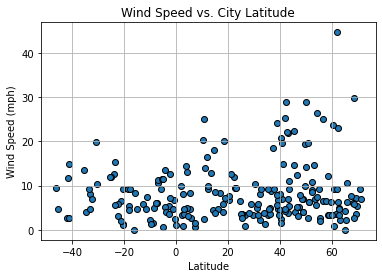

<Figure size 432x288 with 0 Axes>

In [32]:
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", label="Cities")

plt.title("Wind Speed vs. City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

plt.savefig("resources/Fig4.png")

## Linear regression

In [52]:
 # Create a function to create Linear Regression plots
def plot_linregress(x_values, y_values, title, text_coords):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coords,fontsize=13,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value: {rvalue**2}")
    plt.show()

In [35]:
# Create Northern and Southern Hemisphere DataFrames
north_df = clean_df.loc[(clean_df["Lat"] >= 0)]
south_df = clean_df.loc[(clean_df["Lat"] < 0)]

The r-value: 0.6940431772268699


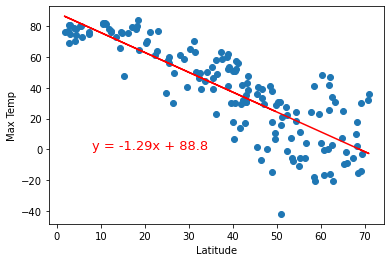

In [54]:
# Linear regression on Northern Hemisphere
x_values = north_df["Lat"]
y_values = north_df["Max Temp"]
plot_linregress(x_values, y_values, 'Max Temp',(8,0))

The r-value: 0.43110017702586517


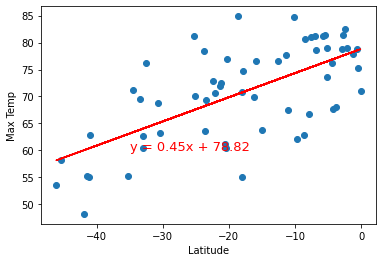

In [55]:
# Linear regression on Southern Hemisphere
x_values = south_df["Lat"]
y_values = south_df["Max Temp"]
plot_linregress(x_values, y_values, 'Max Temp', (-35, 60))

The r-value: 0.10692724240106463


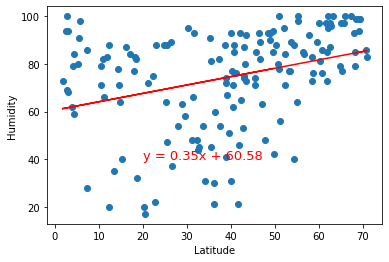

In [56]:
# humidity vs northern hemisphere
x_values = north_df["Lat"]
y_values = north_df["Humidity"]
plot_linregress(x_values, y_values, 'Humidity',(20,40))

The r-value: 0.17195493242902118


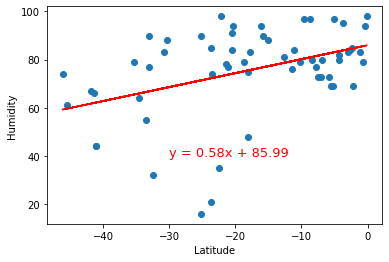

In [59]:
# humidity for Southern Hemisphere
x_values = south_df["Lat"]
y_values = south_df["Humidity"]
plot_linregress(x_values, y_values, 'Humidity', (-30, 40))

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value: 0.0716931367139741


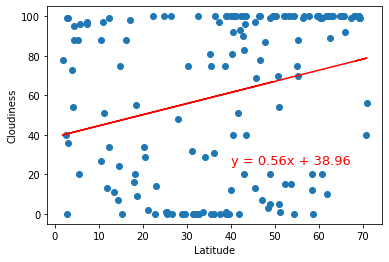

In [62]:
x_values = north_df["Lat"]
y_values = north_df["Cloudiness"]
plot_linregress(x_values, y_values, 'Cloudiness', (40,25))

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value: 0.13333286913234788


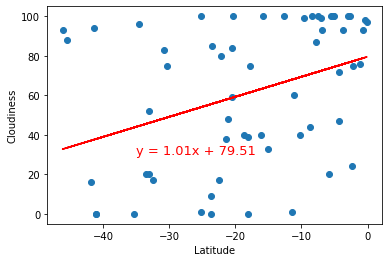

In [64]:
x_values = south_df["Lat"]
y_values = south_df["Cloudiness"]
plot_linregress(x_values, y_values, 'Cloudiness', (-35,30))

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value: 0.006315215673474721


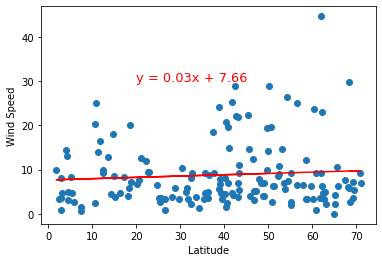

In [66]:
x_values = north_df["Lat"]
y_values = north_df["Wind Speed"]
plot_linregress(x_values, y_values, 'Wind Speed', (20,30))

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value: 0.047050465889909916


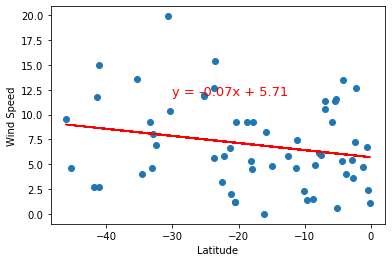

In [71]:
x_values = south_df["Lat"]
y_values = south_df["Wind Speed"]
plot_linregress(x_values, y_values, 'Wind Speed', (-30, 12))